(time_series_with_matrices)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Univariate Time Series with Matrix Algebra

```{contents} Contents
:depth: 2
```

## Overview

This lecture uses matrices to solve some linear difference equations.

As a running example, we’ll study a **second-order linear difference
equation** that was the key technical tool in Paul Samuelson’s 1939
article {cite}`Samuelson1939` that introduced the **multiplier-accelerator** model.

This model became the workhorse that powered early econometric versions of
Keynesian macroeconomic models in the United States.

You can read about the details of that model in {doc}`this <samuelson>`
QuantEcon lecture.

(That lecture also describes some technicalities about second-order linear difference equations.)

We'll also study a "perfect foresight" model of stock prices that involves solving
a "forward-looking" linear difference equation.

We will use the following imports:

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size

## Samuelson's model

Let $t = 0, \pm 1, \pm 2, \ldots$ index time.

For $t = 1, 2, 3, \ldots, T$ suppose that

```{math}
:label: tswm_1

y_{t} = \alpha_{0} + \alpha_{1} y_{t-1} + \alpha_{2} y_{t-2}
```

where we assume that $y_0$ and $y_{-1}$ are given numbers
that we take as **initial conditions**.

In Samuelson's model, $y_t$ stood for **national income** or perhaps a different
measure of aggregate activity called **gross domestic product** (GDP) at time $t$.

Equation {eq}`tswm_1` is called a **second-order linear difference equation**.

But actually, it is a collection of $T$ simultaneous linear
equations in the $T$ variables $y_1, y_2, \ldots, y_T$.

```{note}
To be able to solve a second-order linear difference
equation, we require two **boundary conditions** that can take the form
either of two **initial conditions** or two **terminal conditions** or
possibly one of each.
```

Let’s write our equations as a stacked system

$$
\underset{\equiv A}{\underbrace{\left[\begin{array}{cccccccc}
1 & 0 & 0 & 0 & \cdots & 0 & 0 & 0\\
-\alpha_{1} & 1 & 0 & 0 & \cdots & 0 & 0 & 0\\
-\alpha_{2} & -\alpha_{1} & 1 & 0 & \cdots & 0 & 0 & 0\\
0 & -\alpha_{2} & -\alpha_{1} & 1 & \cdots & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \cdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & 0 & \cdots & -\alpha_{2} & -\alpha_{1} & 1
\end{array}\right]}}\left[\begin{array}{c}
y_{1}\\
y_{2}\\
y_{3}\\
y_{4}\\
\vdots\\
y_{T}
\end{array}\right]=\underset{\equiv b}{\underbrace{\left[\begin{array}{c}
\alpha_{0}+\alpha_{1}y_{0}+\alpha_{2}y_{-1}\\
\alpha_{0}+\alpha_{2}y_{0}\\
\alpha_{0}\\
\alpha_{0}\\
\vdots\\
\alpha_{0}
\end{array}\right]}}
$$

or

$$
A y = b
$$

where

$$
y = \begin{bmatrix} y_1 \cr y_2 \cr \cdots \cr y_T \end{bmatrix}
$$

Evidently $y$ can be computed from

$$
y = A^{-1} b
$$

The vector $y$ is a complete time path $\{y_t\}_{t=1}^T$.

Let’s put Python to work on an example that captures the flavor of
Samuelson’s multiplier-accelerator model.

We'll set parameters equal to the same values we used in {doc}`this QuantEcon lecture <samuelson>`.

In [2]:
T = 80

# parameters
𝛼0 = 10.0
𝛼1 = 1.53
𝛼2 = -.9

y_1 = 28. # y_{-1}
y0 = 24.

Now we construct $A$ and $b$.

In [3]:
A = np.identity(T)  # The T x T identity matrix

for i in range(T):

    if i-1 >= 0:
        A[i, i-1] = -𝛼1

    if i-2 >= 0:
        A[i, i-2] = -𝛼2

b = np.full(T, 𝛼0)
b[0] = 𝛼0 + 𝛼1 * y0 + 𝛼2 * y_1
b[1] = 𝛼0 + 𝛼2 * y0

Let’s look at the matrix $A$ and the vector $b$ for our
example.

In [4]:
A, b

(array([[ 1.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [-1.53,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 0.9 , -1.53,  1.  , ...,  0.  ,  0.  ,  0.  ],
        ...,
        [ 0.  ,  0.  ,  0.  , ...,  1.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ..., -1.53,  1.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ...,  0.9 , -1.53,  1.  ]]),
 array([ 21.52, -11.6 ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,
         10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10.  ,  10

Now let’s solve for the path of $y$.

If $y_t$ is GNP at time $t$, then we have a version of
Samuelson’s model of the dynamics for GNP.

To solve $y = A^{-1} b$ we can either invert $A$ directly, as in

In [5]:
A_inv = np.linalg.inv(A)

y = A_inv @ b

or we can use `np.linalg.solve`:

In [6]:
y_second_method = np.linalg.solve(A, b)

Here make sure the two methods give the same result, at least up to floating
point precision:

In [7]:
np.allclose(y, y_second_method)

True

```{note}
In general, `np.linalg.solve` is more numerically stable than using
`np.linalg.inv` directly. 
However, stability is not an issue for this small example. Moreover, we will
repeatedly use `A_inv` in what follows, so there is added value in computing
it directly.
```

Now we can plot.

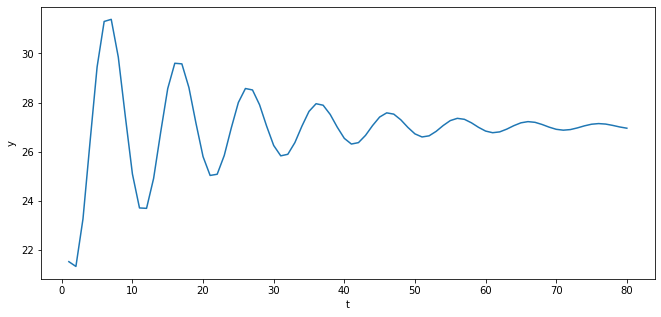

In [8]:
plt.plot(np.arange(T)+1, y)
plt.xlabel('t')
plt.ylabel('y')

plt.show()

The **steady state** value $y^*$ of $y_t$ is obtained by setting $y_t = y_{t-1} =
y_{t-2} = y^*$ in {eq}`tswm_1`, which yields

$$
y^* = \frac{\alpha_{0}}{1 - \alpha_{1} - \alpha_{2}}
$$

If we set the initial values to $y_{0} = y_{-1} = y^*$, then $y_{t}$ will be
constant:

In [9]:
y_star = 𝛼0 / (1 - 𝛼1 - 𝛼2)
y_1_steady = y_star # y_{-1}
y0_steady = y_star

b_steady = np.full(T, 𝛼0)
b_steady[0] = 𝛼0 + 𝛼1 * y0_steady + 𝛼2 * y_1_steady
b_steady[1] = 𝛼0 + 𝛼2 * y0_steady

In [10]:
y_steady = A_inv @ b_steady

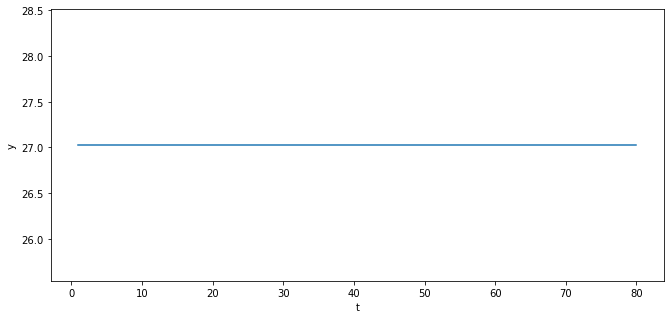

In [11]:
plt.plot(np.arange(T)+1, y_steady)
plt.xlabel('t')
plt.ylabel('y')

plt.show()

## Adding a random term

To generate some excitement, we'll follow in the spirit of the great economists
Eugen Slutsky and Ragnar Frisch and replace our original second-order difference
equation with the following **second-order stochastic linear difference
equation**:

```{math}
:label: tswm_2

y_{t} = \alpha_{0} + \alpha_{1} y_{t-1} + \alpha_{2} y_{t-2} + u_t
```

where $u_{t} \sim N\left(0, \sigma_{u}^{2}\right)$ and is IID,
meaning **independent** and **identically** distributed.

We’ll stack these $T$ equations into a system cast in terms of
matrix algebra.

Let’s define the random vector

$$
u=\left[\begin{array}{c}
u_{1}\\
u_{2}\\
\vdots\\
u_{T}
\end{array}\right]
$$

Where $A, b, y$ are defined as above, now assume that $y$ is
governed by the system

$$
A y = b + u
$$

The solution for $y$ becomes

$$
y = A^{-1} \left(b + u\right)
$$

Let’s try it out in Python.

In [12]:
𝜎u = 2.

In [13]:
u = np.random.normal(0, 𝜎u, size=T)
y = A_inv @ (b + u)

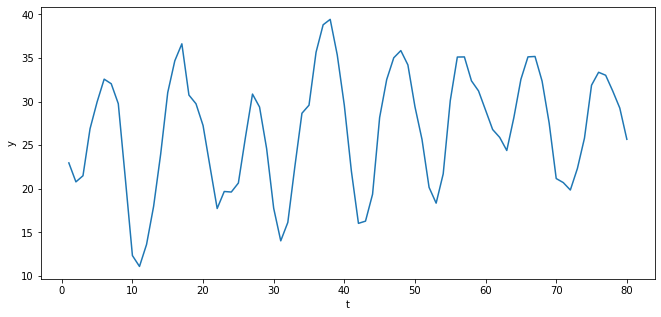

In [14]:
plt.plot(np.arange(T)+1, y)
plt.xlabel('t')
plt.ylabel('y')

plt.show()

The above time series looks a lot like (detrended) GDP series for a
number of advanced countries in recent decades.

We can simulate $N$ paths.

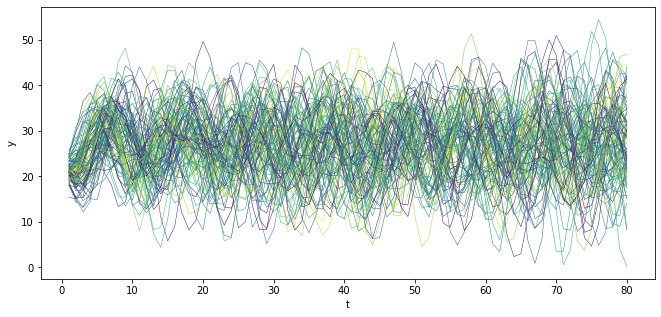

In [15]:
N = 100

for i in range(N):
    col = cm.viridis(np.random.rand())  # Choose a random color from viridis
    u = np.random.normal(0, 𝜎u, size=T)
    y = A_inv @ (b + u)
    plt.plot(np.arange(T)+1, y, lw=0.5, color=col)

plt.xlabel('t')
plt.ylabel('y')

plt.show()

Also consider the case when $y_{0}$ and $y_{-1}$ are at
steady state.

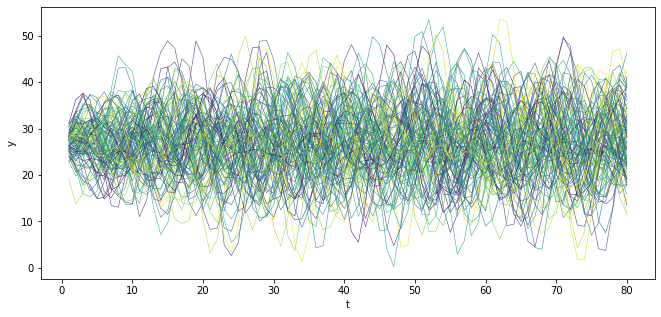

In [16]:
N = 100

for i in range(N):
    col = cm.viridis(np.random.rand())  # Choose a random color from viridis
    u = np.random.normal(0, 𝜎u, size=T)
    y_steady = A_inv @ (b_steady + u)
    plt.plot(np.arange(T)+1, y_steady, lw=0.5, color=col)

plt.xlabel('t')
plt.ylabel('y')

plt.show()

## A forward looking model

Samuelson’s model is **backwards looking** in the sense that we give it **initial conditions** and let it
run.

Let’s now turn to model  that is **forward looking**.

We apply similar linear algebra machinery to study a **perfect
foresight** model widely used as a benchmark in macroeconomics and
finance.

As an example, we suppose that $p_t$ is the price of a stock and
that $y_t$ is its dividend.

We assume that $y_t$ is determined by second-order difference
equation that we analyzed just above, so that

$$
y = A^{-1} \left(b + u\right)
$$

Our **perfect foresight** model of stock prices is

$$
p_{t} = \sum_{j=0}^{T-t} \beta^{j} y_{t+j}, \quad \beta \in (0,1)
$$

where $\beta$ is a discount factor.

The model asserts that the price of the stock at $t$ equals the
discounted present values of the (perfectly foreseen) future dividends.

Form

$$
\underset{\equiv p}{\underbrace{\left[\begin{array}{c}
p_{1}\\
p_{2}\\
p_{3}\\
\vdots\\
p_{T}
\end{array}\right]}}=\underset{\equiv B}{\underbrace{\left[\begin{array}{ccccc}
1 & \beta & \beta^{2} & \cdots & \beta^{T-1}\\
0 & 1 & \beta & \cdots & \beta^{T-2}\\
0 & 0 & 1 & \cdots & \beta^{T-3}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & \cdots & 1
\end{array}\right]}}\left[\begin{array}{c}
y_{1}\\
y_{2}\\
y_{3}\\
\vdots\\
y_{T}
\end{array}\right]
$$

In [17]:
𝛽 = .96

In [18]:
# construct B
B = np.zeros((T, T))

for i in range(T):
    B[i, i:] = 𝛽 ** np.arange(0, T-i)

In [19]:
B

array([[1.        , 0.96      , 0.9216    , ..., 0.04314048, 0.04141486,
        0.03975826],
       [0.        , 1.        , 0.96      , ..., 0.044938  , 0.04314048,
        0.04141486],
       [0.        , 0.        , 1.        , ..., 0.04681041, 0.044938  ,
        0.04314048],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.96      ,
        0.9216    ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.96      ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [20]:
𝜎u = 0.
u = np.random.normal(0, 𝜎u, size=T)
y = A_inv @ (b + u)
y_steady = A_inv @ (b_steady + u)

In [21]:
p = B @ y

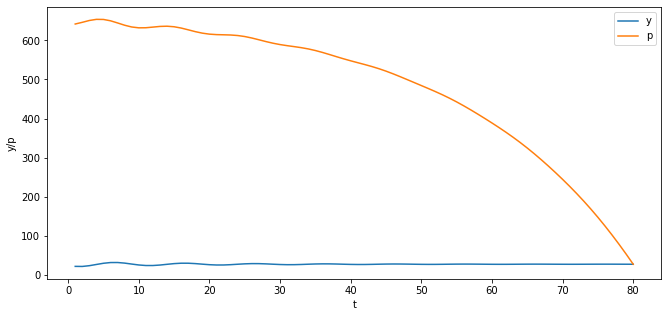

In [22]:
plt.plot(np.arange(0, T)+1, y, label='y')
plt.plot(np.arange(0, T)+1, p, label='p')
plt.xlabel('t')
plt.ylabel('y/p')
plt.legend()

plt.show()

Can you explain why the trend of the price is downward over time?

Also consider the case when $y_{0}$ and $y_{-1}$ are at the
steady state.

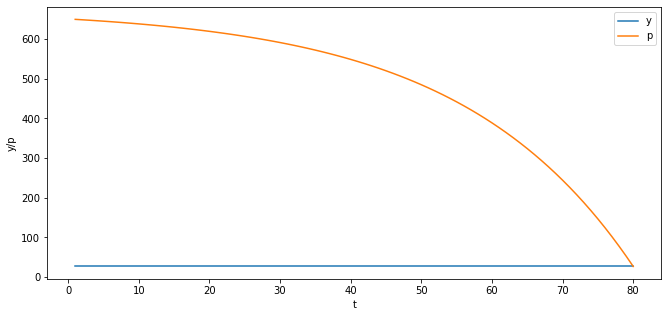

In [23]:
p_steady = B @ y_steady

plt.plot(np.arange(0, T)+1, y_steady, label='y')
plt.plot(np.arange(0, T)+1, p_steady, label='p')
plt.xlabel('t')
plt.ylabel('y/p')
plt.legend()

plt.show()